1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

In [2]:
#Generation of the dataset
N=1000
x1=np.random.normal(loc=0,scale=1,size=N)
x2=x1+np.random.normal(loc=0,scale=3,size=N)
x3=2*x1+x2
ds=np.array([x1,x2,x3])

In [3]:
#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
cov_matrix=np.cov(ds)
print('covariance matrix of the dataset:\n',cov_matrix,'\n')
l,V=la.eig(cov_matrix)
l=np.real_if_close(l)
l_sorted=np.sort(np.real_if_close(l))[::-1]
print('eigenvalues of the covariance matrix from la.eig():\n',l,'\n')
print('eigenvectors of the covariance matrix from la.eig():\n',V,'\n')
#Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
U,s,Vt=la.svd(ds)
l_svd=(s**2)/(N-1)
V_svd=U
print('eigenvalues of the covariance matrix from la.svd():\n',l_svd,'\n')
print('eigenvectors of the covariance matrix from la.svd():\n',V_svd,'\n')
print('The results from the la.eig() method and the la.svd() method are the same as expexted: the unique difference in the two methods comes from the smallest eigenvalues, probabily due to a rounding error. The two sets of eigenvalues also differs in their order: the la.svd() method gives the eigevalues (and the corresponding eigenvectors) sorted in discendent order.')


covariance matrix of the dataset:
 [[ 0.96815418  0.90307442  2.83938279]
 [ 0.90307442 10.6181103  12.42425915]
 [ 2.83938279 12.42425915 18.10302474]] 

eigenvalues of the covariance matrix from la.eig():
 [ 2.76343642e+01 -3.79601115e-16  2.05492504e+00] 

eigenvectors of the covariance matrix from la.eig():
 [[-0.10521681 -0.81649658  0.56768191]
 [-0.5900487  -0.40824829 -0.69654567]
 [-0.80048233  0.40824829  0.43881816]] 

eigenvalues of the covariance matrix from la.svd():
 [2.76350688e+01 2.05525903e+00 9.90777399e-32] 

eigenvectors of the covariance matrix from la.svd():
 [[-0.10520605  0.56768391 -0.81649658]
 [-0.59006191 -0.69653448 -0.40824829]
 [-0.800474    0.43883334  0.40824829]] 

The results from the la.eig() method and the la.svd() method are the same as expexted: the unique difference in the two methods comes from the smallest eigenvalues, probabily due to a rounding error. The two sets of eigenvalues also differs in their order: the la.svd() method gives the eig

In [4]:
#What percent of the total dataset's variability is explained by the principal components?
#Given how the dataset was constructed, do these make sense?
Lambda=np.diag(np.real_if_close(l_sorted))
print('Diagonalized covariance matrix:\n',Lambda,'\n')
print('Eigenvalues sorted in descendant order:\n',l_sorted,'\n')
for eigv in l_sorted:
    print('Variability from the principal component corresponding to the eigenvalue %.4f' %eigv,'\n','%:',eigv*100/Lambda.trace())
print('The {:.6}% of the data\'s variability is explained by the first principal component,'.format(l_sorted[0]*100/Lambda.trace()),' correspoding to %.4f eigenvalue\n' %l_sorted[0])
print('\nGiven how the dataset was constructed the fact that the majority of the information is retained by x1 makes sense, since the second and third variables depend from x1.')
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained
print("By reducing the dimensionality to the biggest two eigenvectors, {:.4f}% of the total data's variability is explained.".format((l_sorted[0]+l_sorted[1])*100/Lambda.trace()))
ds_reduced=np.array([ds[0,:],ds[2,:]])
    

Diagonalized covariance matrix:
 [[ 2.76343642e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.05492504e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.79601115e-16]] 

Eigenvalues sorted in descendant order:
 [ 2.76343642e+01  2.05492504e+00 -3.79601115e-16] 

Variability from the principal component corresponding to the eigenvalue 27.6344 
 %: 93.07856436599232
Variability from the principal component corresponding to the eigenvalue 2.0549 
 %: 6.921435634007681
Variability from the principal component corresponding to the eigenvalue -0.0000 
 %: -1.278579328862164e-15
The 93.0786% of the data's variability is explained by the first principal component,  correspoding to 27.6344 eigenvalue


Given how the dataset was constructed the fact that the majority of the information is retained by x1 makes sense, since the second and third variables depend from x1.
By reducing the dimensionality to the biggest two eigenvectors, 100.0000% of the total data's variability is e

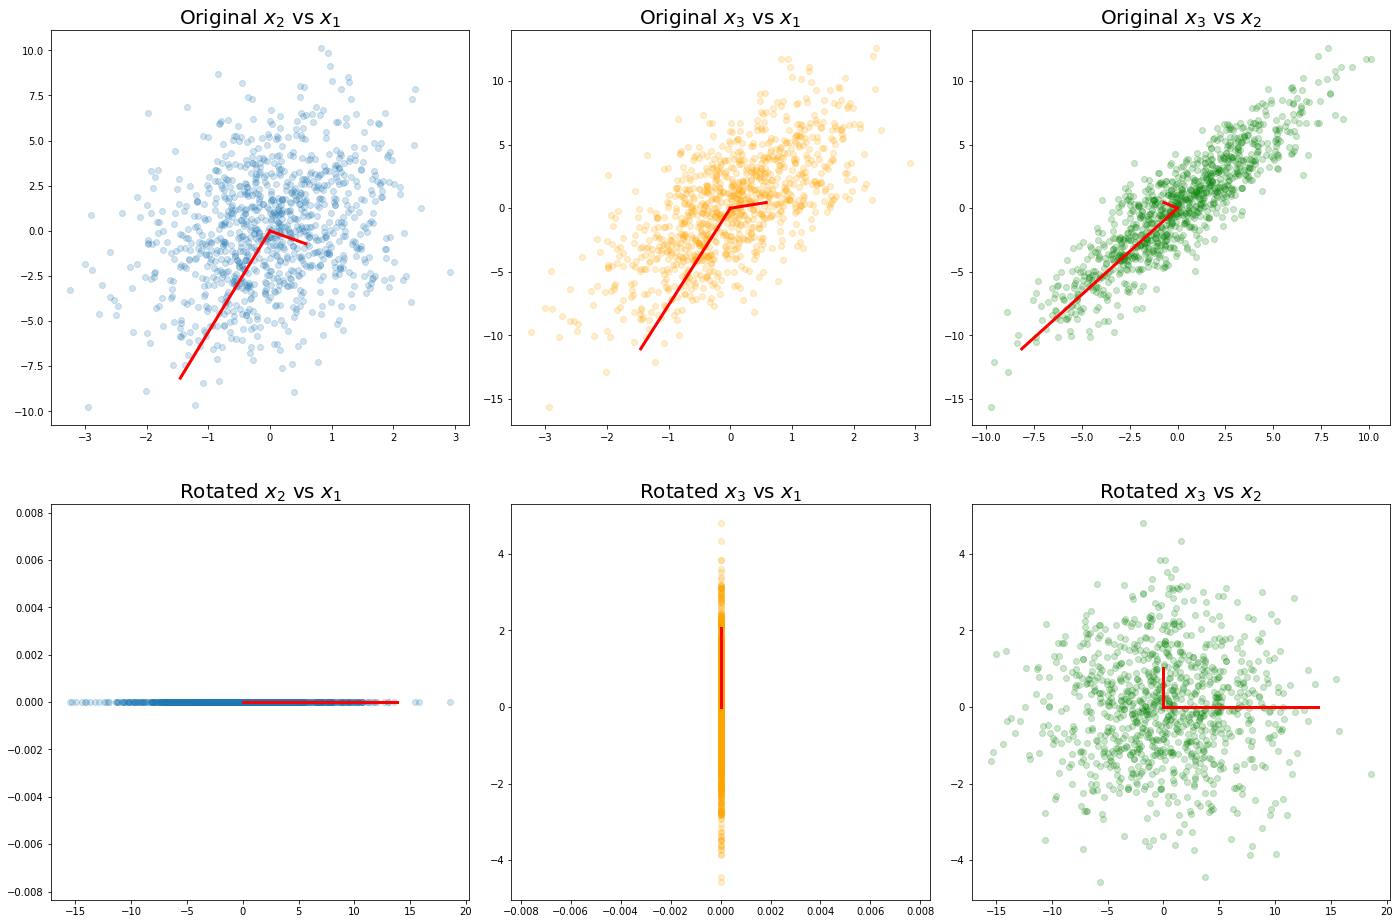

In [5]:
dsp=np.dot(V.T,ds)
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))

scale_factor = 0.5

#original dataset
ax1.scatter(ds[0,:], ds[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax1.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=3)
ax1.set_title('Original $x_2$ vs $x_1$', fontsize=20)

ax2.scatter(ds[0,:], ds[2,:], alpha=0.2,color='orange')
for li, vi in zip(l, V.T):
    ax2.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=3)    
ax2.set_title('Original $x_3$ vs $x_1$', fontsize=20)

ax3.scatter(ds[1,:], ds[2,:], alpha=0.2,color='green')
for li, vi in zip(l, V.T):
    ax3.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=3)    
ax3.set_title('Original $x_3$ vs $x_2$', fontsize=20)

#rotated dataset
ax4.scatter(dsp[0,:], dsp[1,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax4.plot([0, 0.5*li*vi[0]], [0, li*vi[1]], 'r-', lw=3)
ax4.set_title('Rotated $x_2$ vs $x_1$', fontsize=20)

ax5.scatter(dsp[1,:], dsp[2,:], alpha=0.2,color='orange')
for li, vi in zip(l, np.diag([1]*3)):
    ax5.plot([0, li*vi[1]], [0, li*vi[2]], 'r-', lw=3)
ax5.set_title('Rotated $x_3$ vs $x_1$', fontsize=20)

ax6.scatter(dsp[0,:], dsp[2,:], alpha=0.2,color='green')
for li, vi in zip(l, np.diag([1]*3)):
    ax6.plot([0, 0.5*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=3)
ax6.set_title('Rotated $x_3$ vs $x_2$', fontsize=20)

plt.subplots_adjust(wspace = 0.1)
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [6]:
dsn=np.zeros((13,N))
dsn[0:3,:]=ds
for i in range (3,13):
    std=np.random.randint(1,4)
    std=std/50
    dsn[i]=np.random.normal(0,std,N)
covn_matrix=np.cov(dsn)
ln,Vn=la.eig(covn_matrix)
print("{:.4f}% of the total dataset's variability is explained by the first principal component.".format(np.real_if_close(ln[0]/covn_matrix.trace())*100))
print('Given the fact that the standard deviation of the noise is much smaller than those of the three original variables doesen\'t affect in a significant way the information given by the first principal component.')


93.0022% of the total dataset's variability is explained by the first principal component.
Given the fact that the standard deviation of the noise is much smaller than those of the three original variables doesen't affect in a significant way the information given by the first principal component.


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [7]:
magic=pd.read_csv('~/data/magic04.data',nrows=1500)
magic.columns=['Lenght','Width','fSize','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist','Class']
magic

Lenght     Width   fSize    Conc   Conc1      Asym   M3Long  M3Trans  \
0      31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
1     162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
2      23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
3      75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   
4      51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887   9.8145   
...        ...       ...     ...     ...     ...       ...      ...      ...   
1495   36.8621   14.2671  2.7896  0.3539  0.2183   19.5260  30.4941  -7.6983   
1496   67.8366   28.4716  3.3460  0.1506  0.0796   37.8857  71.0032 -10.6167   
1497   54.7330   14.7307  2.6950  0.3047  0.1826   38.3660  47.9121  -4.6043   
1498   52.1044   17.2225  2.9523  0.3248  0.2037   29.9876  52.6747  -7.3971   
1499   52.3766   16.1986  2.7372  0.2344  0.1200   74.6848  40.4711  -3.6452   

        Alpha     Dist Class  
0      6.3609  205.261     g  
1     76.9600  256.788     g  
2     10.4490  116.737     g  
3      4.6480  356.462     g  
4      3.6130  238.098     g  
...       ...      ...   ...  
1495  14.4244  157.392     g  
1496  21.3936  144.225     g  
1497   6.3810  174.530     g  
1498   5.8345  263.582     g  
1499   8.8454  230.038     g  

[1500 rows x 11 columns]

In [8]:
magic=magic.drop(['Class'],axis=1)
magicData=magic.T
magicData

0         1         2         3         4         5         6     \
Lenght    31.6036  162.0520   23.8172   75.1362   51.6240   48.2468   26.7897   
Width     11.7235  136.0310    9.5728   30.9205   21.1502   17.3565   13.7595   
fSize      2.5185    4.0612    2.3385    3.1611    2.9085    3.0332    2.5521   
Conc       0.5303    0.0374    0.6147    0.3168    0.2420    0.2529    0.4236   
Conc1      0.3773    0.0187    0.3922    0.1832    0.1340    0.1515    0.2174   
Asym      26.2722  116.7410   27.2107   -5.5277   50.8761    8.5730   29.6339   
M3Long    23.8238  -64.8580   -6.4633   28.5525   43.1887   38.0957   20.4560   
M3Trans   -9.9574  -45.2160   -7.1513   21.8393    9.8145   10.5868   -2.9292   
Alpha      6.3609   76.9600   10.4490    4.6480    3.6130    4.7920    0.8120   
Dist     205.2610  256.7880  116.7370  356.4620  238.0980  219.0870  237.1340   

             7         8         9     ...      1490      1491      1492  \
Lenght    96.2327   46.7619   62.7766  ...   56.7107   50.1521   26.5670   
Width     46.5165   15.1993   29.9104  ...   17.0717   13.7293   18.8150   
fSize      4.1540    2.5786    3.3331  ...    2.7490    2.3820    2.8176   
Conc       0.0779    0.3377    0.2475  ...    0.2210    0.3610    0.3227   
Conc1      0.0390    0.1913    0.1261  ...    0.1221    0.1888    0.2017   
Asym     110.3550   24.7548  -33.9065  ...  -20.0571  -66.4702   11.1595   
M3Long    85.0486   43.8771   57.5848  ...  -33.8718  -24.7630   15.0154   
M3Trans   43.1844   -6.6812   23.7710  ...   -4.3812    8.4541    8.5459   
Alpha      4.8540    7.8750    9.9144  ...    2.4890    2.6206   12.3055   
Dist     248.2260  102.2510  323.0940  ...  162.5380  219.9110  226.5670   

             1493      1494      1495      1496      1497      1498      1499  
Lenght    88.1057   92.7062   36.8621   67.8366   54.7330   52.1044   52.3766  
Width     28.1339   18.1531   14.2671   28.4716   14.7307   17.2225   16.1986  
fSize      3.4716    2.8822    2.7896    3.3460    2.6950    2.9523    2.7372  
Conc       0.1921    0.2230    0.3539    0.1506    0.3047    0.3248    0.2344  
Conc1      0.1052    0.1292    0.2183    0.0796    0.1826    0.2037    0.1200  
Asym      82.4004 -170.7720   19.5260   37.8857   38.3660   29.9876   74.6848  
M3Long    87.4095   78.0131   30.4941   71.0032   47.9121   52.6747   40.4711  
M3Trans  -15.7864   10.9458   -7.6983  -10.6167   -4.6043   -7.3971   -3.6452  
Alpha      5.5776    0.9333   14.4244   21.3936    6.3810    5.8345    8.8454  
Dist     263.6200  228.6860  157.3920  144.2250  174.5300  263.5820  230.0380  

[10 rows x 1500 columns]

In [9]:
magic_cov=np.cov(magicData)
lm,Vm=la.eig(magic_cov)
lm=np.real_if_close(lm)
lm_sorted=np.sort(lm)[::-1]
threshold=.95
var=0
i=0
while var<threshold:
    var+=lm_sorted[i]/magic_cov.trace()
    i+=1
print('The {:.4f}% of the sistem\'s variability is explained by the first principal component.'.format(lm_sorted[0]*100/magic_cov.trace()))
print('The first {} eigenvalues explain the {:.4f}% of the sistem\'s variability' .format(i,var*100))


The 60.6848% of the sistem's variability is explained by the first principal component.
The first 5 eigenvalues explain the 97.6080% of the sistem's variability
